# Linear Regression Project 1

- 앞에서 공부했던 개념에 대해 익히기 위해 넣어놓았음
- Concept 에서 주석을 통해 상세히 적어두었기에 여기선 주석 및 설명을 달지 않음

**실습 내용**
- Happy 데이터를 불러옴
- 수입에 따른 행복도(target)를 확인
- 모델을 만들어 테스트 데이터에 대해 예측하고 평가함

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

In [3]:
# 상위 5개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
# 하위 5개 행 확인
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


In [7]:
# 기초통계량 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


In [6]:
# 변수 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


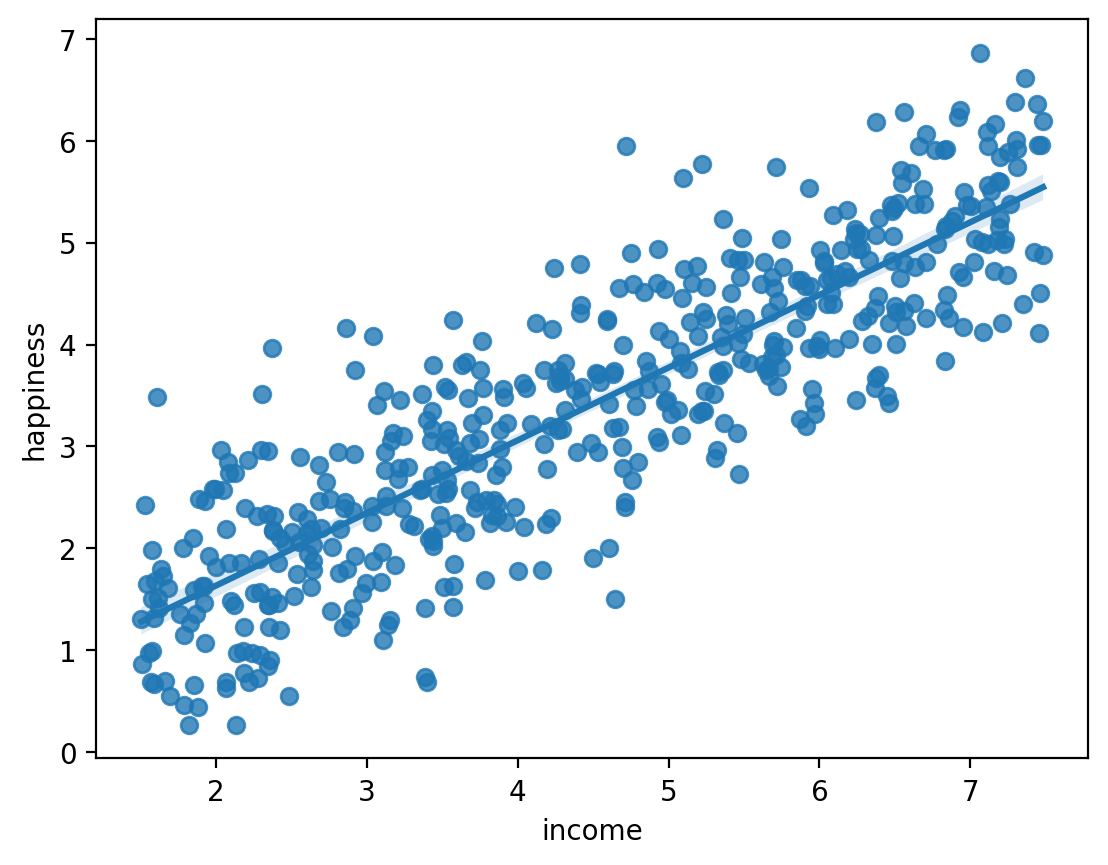

In [8]:
# Income -> Happiness 관계 확인
sns.regplot(x='income', y='happiness', data=data)
plt.show()

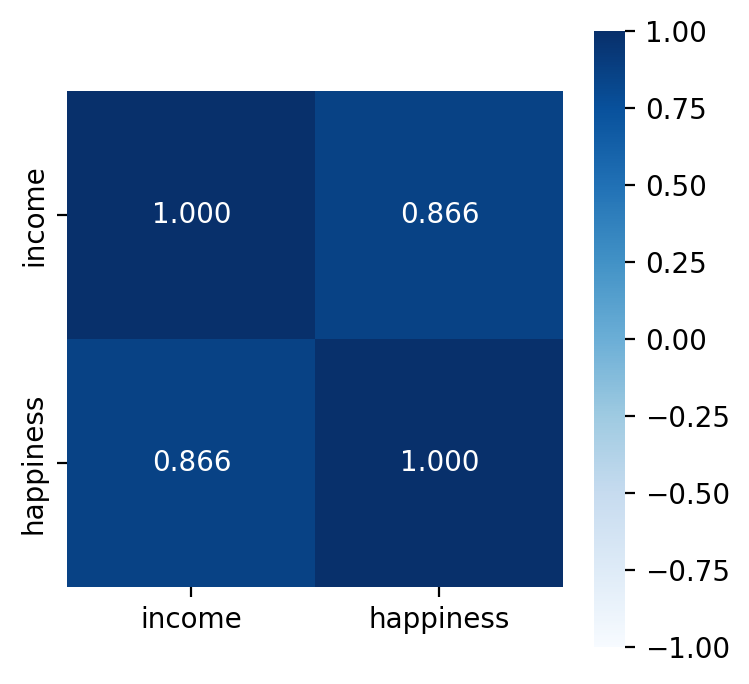

In [10]:
# 상관관계 heatmap으로 확인
plt.figure(figsize=(4, 4))
sns.heatmap(data.corr(),
            annot=True,
            fmt='.3f',
            vmin=-1, vmax=1,
            square=True,
            cmap='Blues')
plt.show()

In [11]:
# target 확인
target = 'happiness'

# data 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [12]:
# 학습용, 평가용 data 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 0.5588237111283767
r2: 0.7545536758581622


In [14]:
# 계수 확인
print(model.coef_)
print(model.intercept_)

[0.72244152]
0.15849441169520517


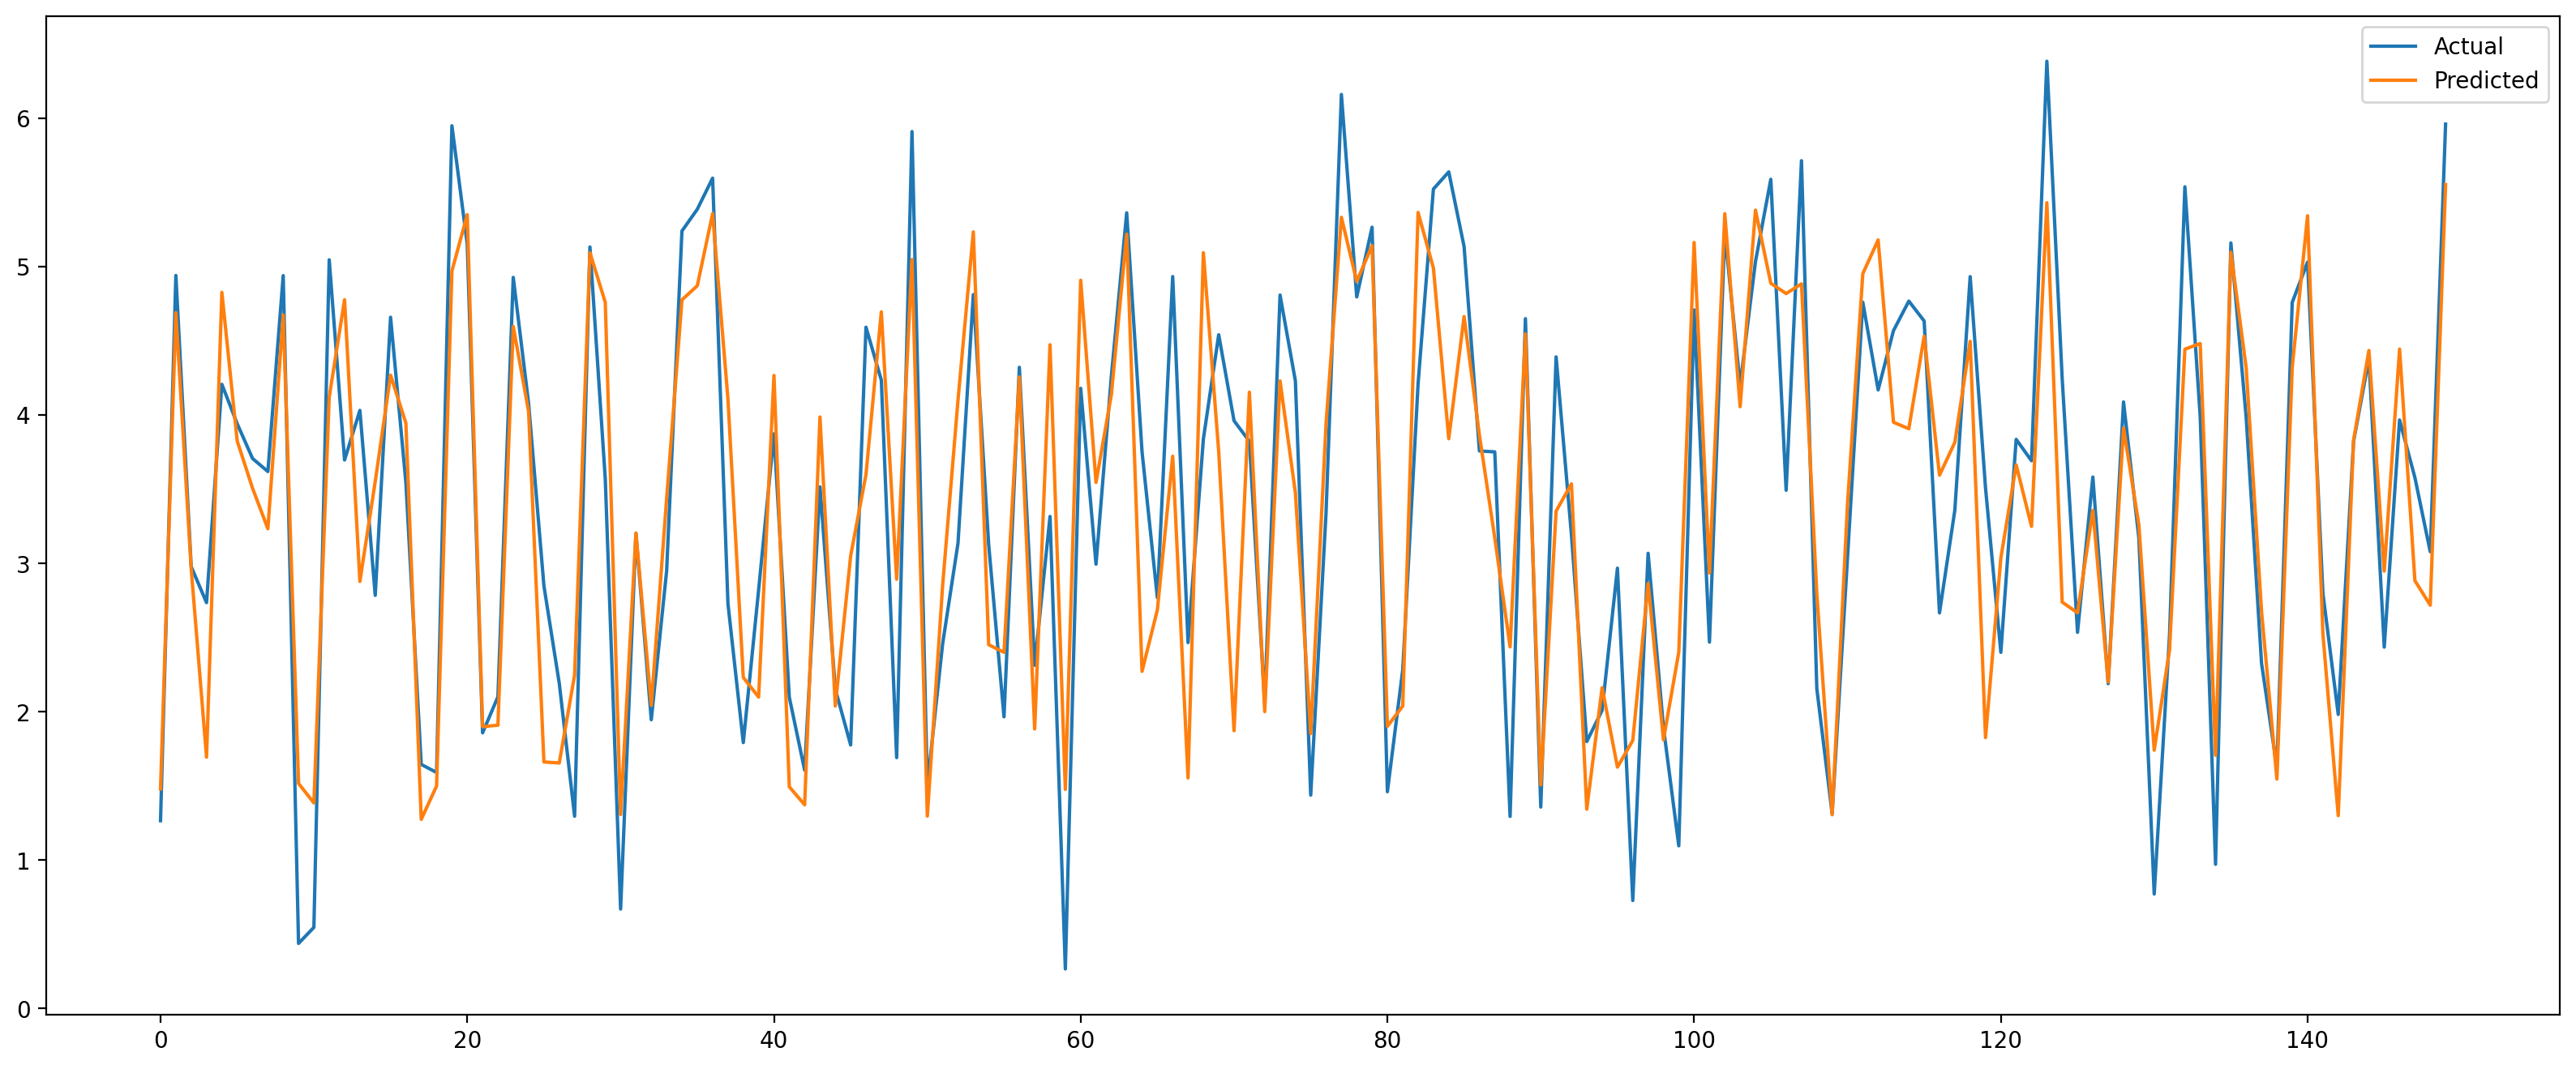

In [16]:
# 시각화
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

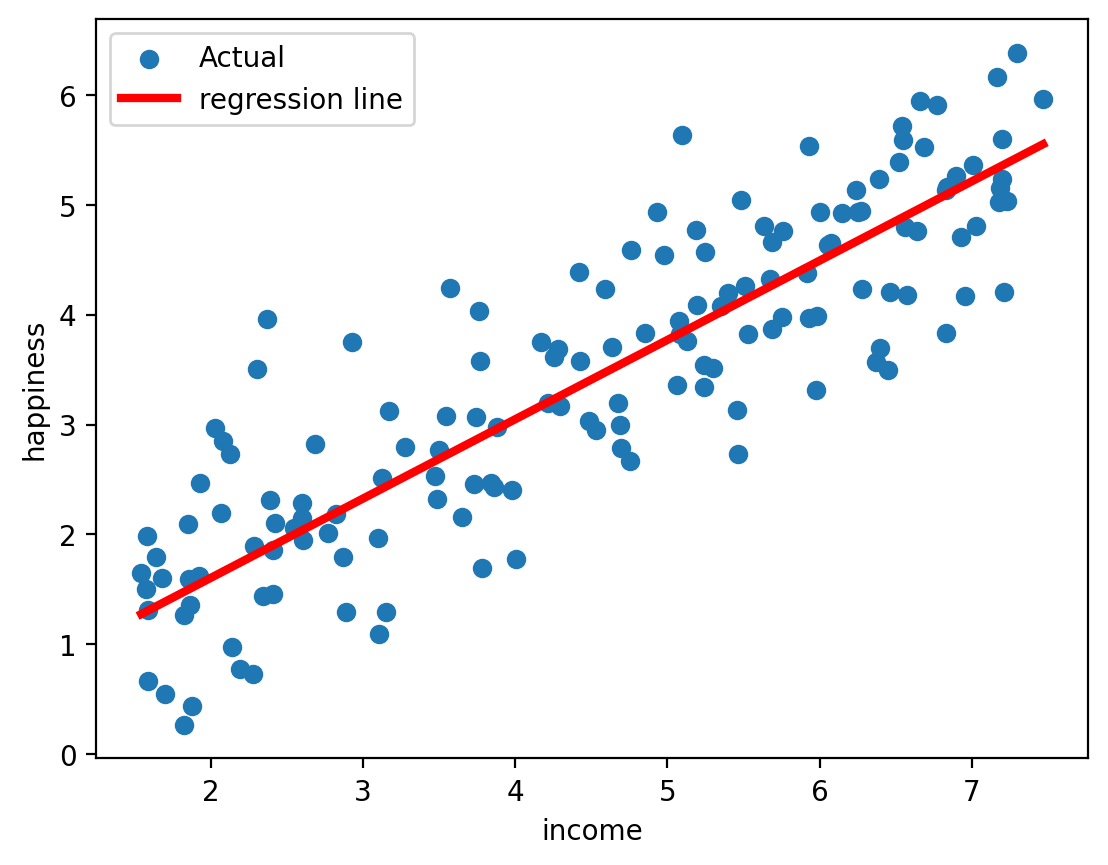

In [20]:
# 회귀선 나타내기
a, b = model.coef_, model.intercept_

income = [min(x_test['income']), max(x_test['income'])]
happiness = a*income + b

plt.scatter(x_test['income'], y_test.values, label='Actual')
plt.plot(income, happiness, label='regression line', color='r', linewidth=3)
plt.xlabel('income')
plt.ylabel('happiness')
plt.legend()
plt.show()